In [1]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
### Céline
%cd C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas
### Hermine

### Tarik


C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas


In [3]:
# Import df_meteo-velib
df = pd.read_csv('2018-2021_donnees-velib-meteo_hour.csv')

In [4]:
#création de df2 qui fait la moyenne des comptages horaires par mois
df2 = df.groupby(['Y_Date_Count','M_Date_Count']).agg({'Count_by_hour': 'mean'})
df2['Y_Date_Count'] = df2.index.get_level_values(0)
df2['M_Date_Count'] = df2.index.get_level_values(1)
df2['Y_M_Date_Count'] = df2['Y_Date_Count'].astype(str) + '-' + df2['M_Date_Count'].astype(str)
df2

Count_by_hour  Y_Date_Count  M_Date_Count  \
Y_Date_Count M_Date_Count                                              
2018         1                 16.670219          2018             1   
             2                 13.700680          2018             2   
             3                 18.607644          2018             3   
             4                 25.114683          2018             4   
             5                 27.352439          2018             5   
             6                 30.492987          2018             6   
             7                 31.041028          2018             7   
             8                 23.547715          2018             8   
             9                 37.538657          2018             9   
             10                38.757392          2018            10   
             11                31.561097          2018            11   
             12                28.984966          2018            12   
2019         1                 30.047073          2019             1   
             2                 36.129266          2019             2   
             3                 35.484406          2019             3   
             4                 38.595093          2019             4   
             5                 36.798955          2019             5   
             6                 38.931636          2019             6   
             7                 45.091189          2019             7   
             8                 33.588740          2019             8   
             9                 55.853221          2019             9   
             10                49.842250          2019            10   
             11                36.006825          2019            11   
             12                68.386358          2019            12   
2020         1                 65.002369          2020             1   
             2                 42.569453          2020             2   
             3                 29.113478          2020             3   
             4                 12.290245          2020             4   
             5                 53.701875          2020             5   
             6                 83.847980          2020             6   
             7                 79.852598          2020             7   
             8                 53.110448          2020             8   
             9                 89.797264          2020             9   
             10                63.281629          2020            10   
             11                43.877486          2020            11   
             12                39.803847          2020            12   
2021         1                 41.448488          2021             1   
             2                 45.420134          2021             2   
             3                 58.945166          2021             3   
             4                 55.762829          2021             4   
             5                 55.609536          2021             5   

                          Y_M_Date_Count  
Y_Date_Count M_Date_Count                 
2018         1                    2018-1  
             2                    2018-2  
             3                    2018-3  
             4                    2018-4  
             5                    2018-5  
             6                    2018-6  
             7                    2018-7  
             8                    2018-8  
             9                    2018-9  
             10                  2018-10  
             11                  2018-11  
             12                  2018-12  
2019         1                    2019-1  
             2                    2019-2  
             3                    2019-3  
             4                    2019-4  
             5                    2019-5  
             6                    2019-6  
             7                    2019-7  
             8             

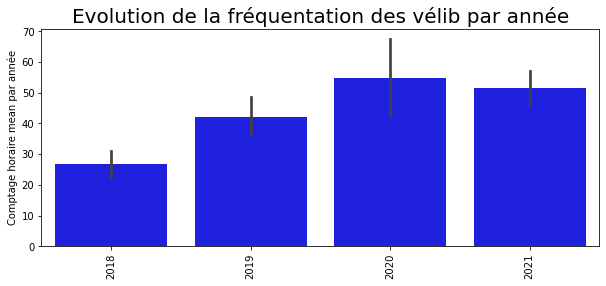

In [5]:
#Affichage de l'évolution des comptages horaires moyen par année
fig = plt.figure(figsize = (10,4))
sns.barplot(x = df2['Y_Date_Count'], y = df2['Count_by_hour'], color = 'b');
plt.title('Evolution de la fréquentation des vélib par année', fontsize = 20)
plt.ylabel('Comptage horaire mean par année')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

- Malgrès les confinements en 2020, la fréquentation des vélib ne cesse d'augmenter
- 2021 n'est pas une année complète (janvier-mai) ce qui peut expliquer la baisse de fréquentation n'étant pas comparable aux autres années.

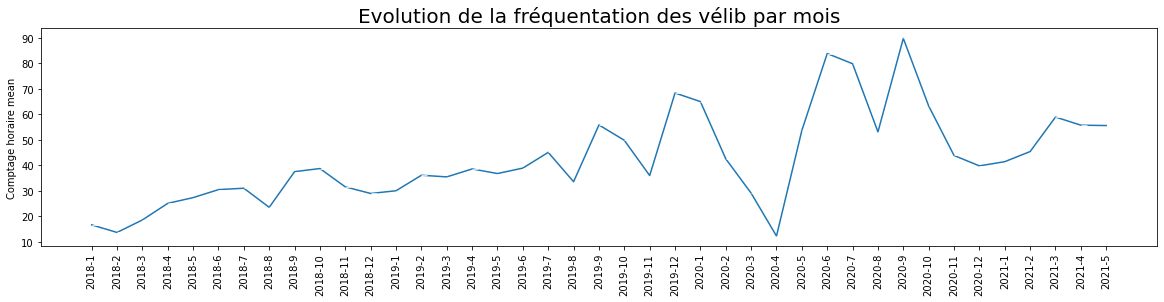

In [6]:
#Affichage de l'évolution des comptages horaires moyen par mois
fig = plt.figure(figsize = (20,4))
sns.lineplot(x = df2['Y_M_Date_Count'], y = df2['Count_by_hour'], ci=None, marker = True);
plt.title('Evolution de la fréquentation des vélib par mois', fontsize = 20)
plt.ylabel('Comptage horaire mean')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()

In [6]:
#création de df2 qui fait la moyenne des comptages horaires par jour
df3 = df.groupby(['Y_Date_Count','M_Date_Count', 'D_Date_Count']).agg({'Count_by_hour': 'mean'})
df3['Y_Date_Count'] = df3.index.get_level_values(0)
df3['M_Date_Count'] = df3.index.get_level_values(1)
df3['D_Date_Count'] = df3.index.get_level_values(2)
df3['M_D_Date_Count'] = df3['M_Date_Count'].astype(str) + '-' + df3['D_Date_Count'].astype(str)
df3

Count_by_hour  Y_Date_Count  \
Y_Date_Count M_Date_Count D_Date_Count                                
2018.0       1.0          1.0                4.178571        2018.0   
                          2.0               11.375000        2018.0   
                          3.0               10.330357        2018.0   
                          4.0               11.214286        2018.0   
                          5.0               14.517857        2018.0   
...                                               ...           ...   
2021.0       5.0          25.0              67.552835        2021.0   
                          26.0              66.333763        2021.0   
                          27.0              85.024485        2021.0   
                          28.0              80.985825        2021.0   
                          29.0              71.689433        2021.0   

                                        M_Date_Count  D_Date_Count  \
Y_Date_Count M_Date_Count D_Date_Count                               
2018.0       1.0          1.0                    1.0           1.0   
                          2.0                    1.0           2.0   
                          3.0                    1.0           3.0   
                          4.0                    1.0           4.0   
                          5.0                    1.0           5.0   
...                                              ...           ...   
2021.0       5.0          25.0                   5.0          25.0   
                          26.0                   5.0          26.0   
                          27.0                   5.0          27.0   
                          28.0                   5.0          28.0   
                          29.0                   5.0          29.0   

                                       M_D_Date_Count  
Y_Date_Count M_Date_Count D_Date_Count                 
2018.0       1.0          1.0                 1.0-1.0  
                          2.0                 1.0-2.0  
                          3.0                 1.0-3.0  
                          4.0                 1.0-4.0  
                          5.0                 1.0-5.0  
...                                               ...  
2021.0       5.0          25.0               5.0-25.0  
                          26.0               5.0-26.0  
                          27.0               5.0-27.0  
                          28.0               5.0-28.0  
                          29.0               5.0-29.0  

[1243 rows x 5 columns]

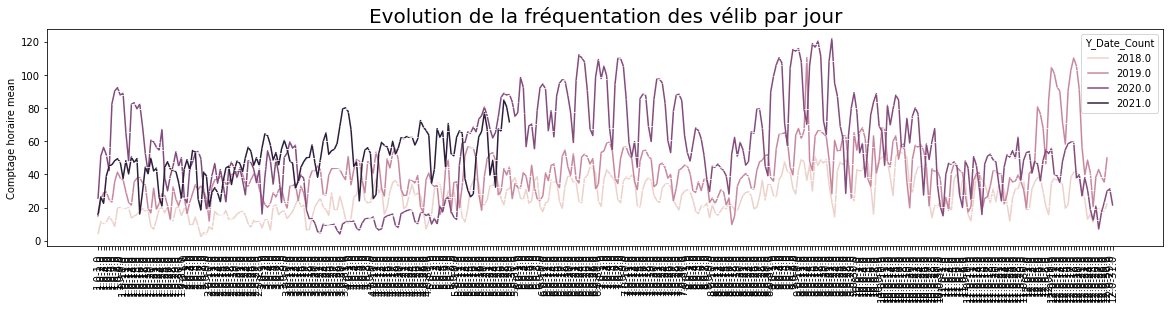

In [7]:
#Affichage de l'évolution des comptages horaires moyen par jour
fig = plt.figure(figsize = (20,4))
sns.lineplot(x = df3['M_D_Date_Count'], y = df3['Count_by_hour'], ci=None, marker = True, hue = df3['Y_Date_Count'] );
plt.title('Evolution de la fréquentation des vélib par jour', fontsize = 20)
plt.ylabel('Comptage horaire mean')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.show()